<a href="https://colab.research.google.com/github/HamedFarahani89/Statistical-methods-and-Quantitative-finance/blob/main/ARIMA_co2_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AutoregRessive Integrated Moving Average

https://www.digitalocean.com/community/tutorials/a-guide-to-time-series-forecasting-with-arima-in-python-3#step-4-parameter-selection-for-the-arima-time-series-model

In [1]:
import warnings
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

# data preparation

In [2]:
data = sm.datasets.co2.load_pandas()
y = data.data
y

,co2
1958-03-29,316.1
1958-04-05,317.3
1958-04-12,317.6
1958-04-19,317.5
1958-04-26,316.4
...,...
2001-12-01,370.3
2001-12-08,370.8
2001-12-15,371.2
2001-12-22,371.3


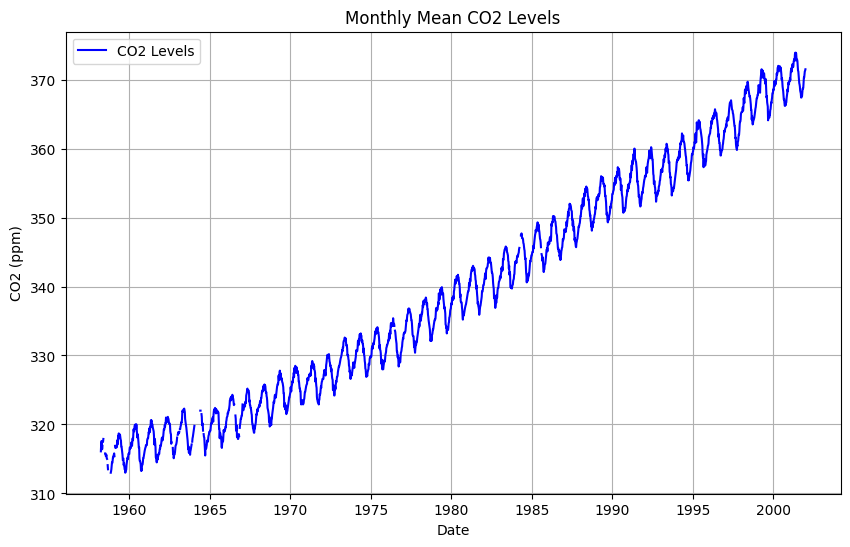

In [3]:
plt.figure(figsize=(10, 6))
plt.plot(y.index, y['co2'].values, label='CO2 Levels', color='blue', linestyle='-')

# Enhancing the plot
plt.title('Monthly Mean CO2 Levels')
plt.xlabel('Date')
plt.ylabel('CO2 (ppm)')
plt.grid(True)
plt.legend()

In [4]:
print("NaN values in each column:\n", y.isna().sum())

NaN values in each column:
 co2    59
dtype: int64


In [5]:
# The 'MS' string groups the data in buckets by start of the month
y = y['co2'].resample('MS').mean()

# The term bfill means that we use the value before filling in missing values
y = y.fillna(y.bfill())

print(y)

1958-03-01    316.100000
1958-04-01    317.200000
1958-05-01    317.433333
1958-06-01    315.625000
1958-07-01    315.625000
                 ...    
2001-08-01    369.425000
2001-09-01    367.880000
2001-10-01    368.050000
2001-11-01    369.375000
2001-12-01    371.020000
Freq: MS, Name: co2, Length: 526, dtype: float64


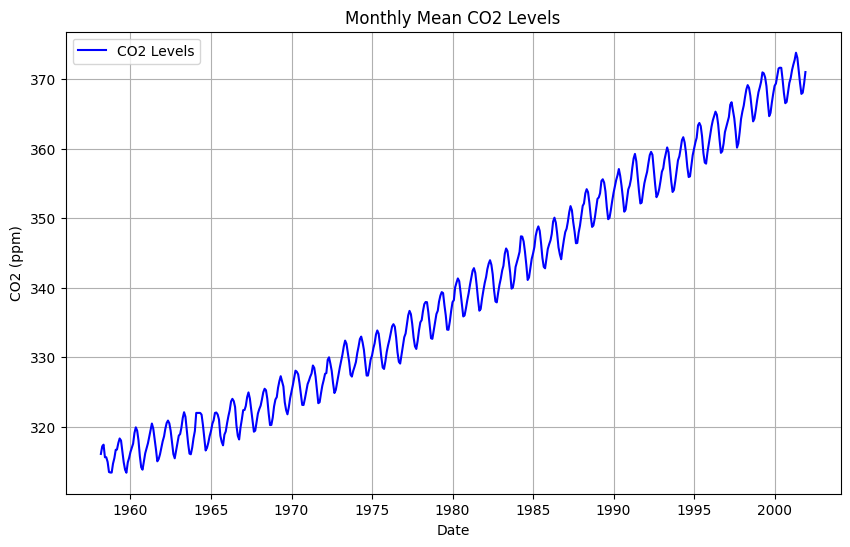

In [6]:
plt.figure(figsize=(10, 6))
plt.plot( y, label='CO2 Levels', color='blue', linestyle='-')

# Enhancing the plot
plt.title('Monthly Mean CO2 Levels')
plt.xlabel('Date')
plt.ylabel('CO2 (ppm)')
plt.grid(True)
plt.legend()

# Parameter tuning for the ARIMA Time Series Model

In [7]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)


# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 1, 0),
 (0, 1, 1),
 (1, 0, 0),
 (1, 0, 1),
 (1, 1, 0),
 (1, 1, 1)]

In [8]:
# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
seasonal_pdq

[(0, 0, 0, 12),
 (0, 0, 1, 12),
 (0, 1, 0, 12),
 (0, 1, 1, 12),
 (1, 0, 0, 12),
 (1, 0, 1, 12),
 (1, 1, 0, 12),
 (1, 1, 1, 12)]

In [9]:
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


# Grid search

In [10]:
warnings.filterwarnings("ignore") # specify to ignore warning messages
aic_values = []

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()
            aic_values.append((param, param_seasonal, results.aic)) # AIC (Akaike Information Criterion)
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:7612.583429881011
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:6787.34362404079
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:1854.8282341411787
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:1596.7111727636975
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:1058.938892132007
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1056.2878382366332
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:1361.657897807711
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:1044.7647912841048
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:6881.048755640422
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:6072.662327706686
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:1379.1941067057987
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:1241.4174716833727
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:1111.7818109833097
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:801.4642720185643
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:1119.5957893610284
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:807.09129881839
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:1675.8086923024289
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1240.2211199194037
ARI

In [11]:
# Find the best model parameters based on the lowest AIC value
best_model = min(aic_values, key=lambda x: x[2])
print(f'\nBest model: ARIMA{best_model[0]}x{best_model[1]}12 - AIC:{best_model[2]}')


Best model: ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:277.7802190184549


In [12]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3182      0.092      3.441      0.001       0.137       0.499
ma.L1         -0.6254      0.077     -8.162      0.000      -0.776      -0.475
ar.S.L12       0.0010      0.001      1.732      0.083      -0.000       0.002
ma.S.L12      -0.8769      0.026    -33.811      0.000      -0.928      -0.826
sigma2         0.0972      0.004     22.632      0.000       0.089       0.106


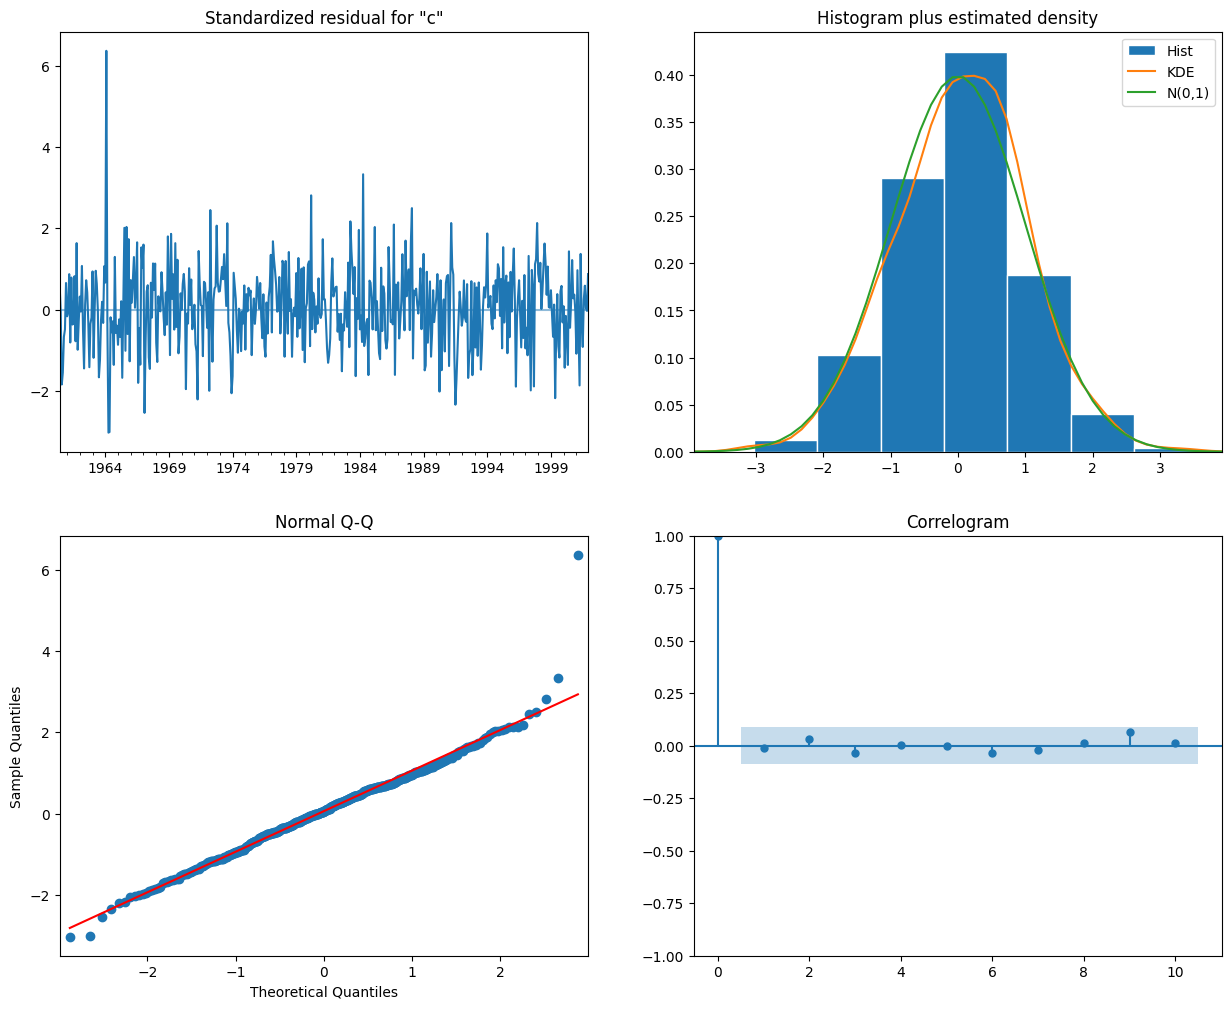

In [13]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

# Forecasting

In [14]:
pred = results.get_prediction(start=pd.to_datetime('1998-01-01'), dynamic=False)
pred_ci = pred.conf_int()

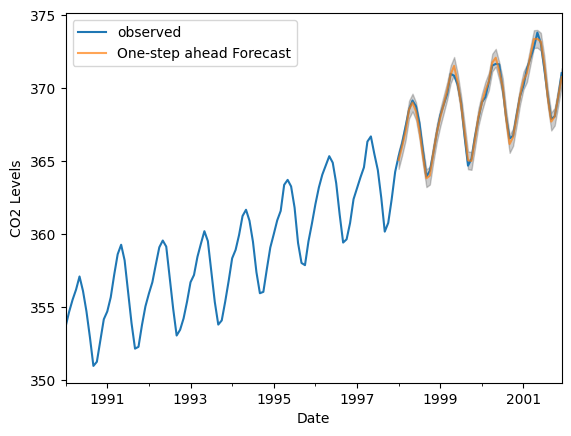

In [15]:
ax = y['1990':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('CO2 Levels')
plt.legend()

plt.show()

In [16]:
# Get forecast 500 steps ahead in future
pred_uc = results.get_forecast(steps=500)

# Get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()

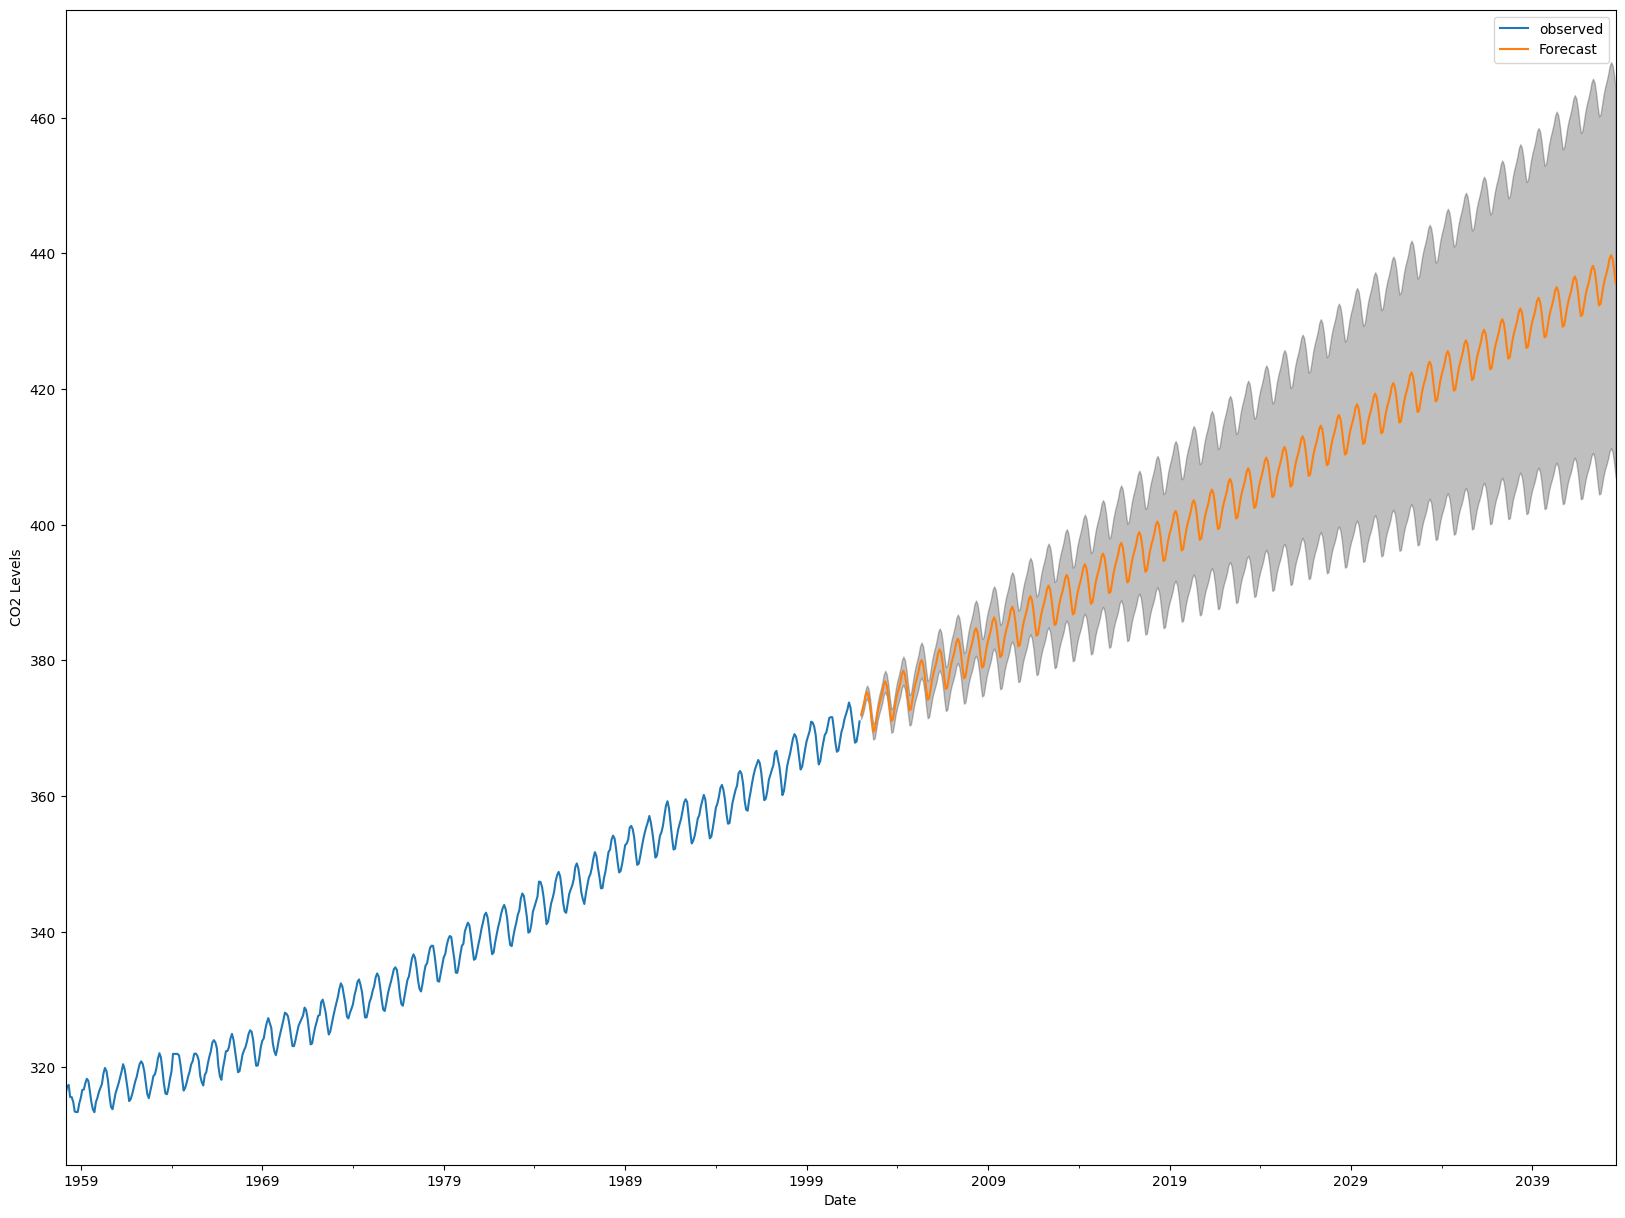

In [17]:
ax = y.plot(label='observed', figsize=(20, 15))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('CO2 Levels')

plt.legend()
plt.show()